# **Practico Mentoria - Aprendizaje No Supervisado**
---

Se propone la elaboración de un informe o presentación, en formato estatico:
* PDF
* Markdowns
* Google Docs

Que responda a las cuestiones solicitadas en cada seccion de esta **Jupyter Notebook**.

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.  
Por lo cual debe estar redactado de forma consisa y comprensible.

## **Referencias**:
* https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3
* https://www.intechopen.com/online-first/clustering-of-time-series-data
* http://halweb.uc3m.es/esp/Personal/personas/amalonso/esp/ASDM-C02-clustering.pdf
* https://tslearn.readthedocs.io/en/stable/

## **Clustering to Time Series Data**

La idea de este practico es poder aplicar Tecnicas de Clustering sobre los diferentes `PUNTO_MEDICION` (que podemos considerar como Series Temporales independientes), con el fin de determinar diferentes agrupamientos en donde los `PUNTOS_MEDICION` sean similares, en algun sentido. 

Para ello pueden utilizar la libreria `tslearn`, la cual es una libreria de machine learning para el analisis de Series Temporales, construidas a partir de la las librerias `scikit-learn` y `numpy` entre otras.


## Resumen

En esta notebook proponemos un análisis al Dataset en su conjunto, teniendo como premisa la estandarización del tráfico que caracteriza a la feature *outbound* en Gigabits, es decir, no individualizamos equipos que operan en Megabits y Gigabits para no forzar el agrupamiento en diferentes Cluster.
Esto se desarrola las secciones de 1 a 4

En la segunda parte 
En esta notebook proponemos el análisis del Dataset teniendo en cuenta el agrupamiento de primera parte, pero analizando el cluster que mayor numero puntos de medicion agrupa, verificando los diferentes Cluster internos.


Y por último La ultima parte 

En la presente notebook seleccionaremos un equipo en particular para analizar la forma en que el modelo clusteriza o agrupa los puntos de medicion. Estandarizando el tráfico de salida (feaure *outbpound*) en Gigabits.

## 1 Inicialización del entorno
---

In [1]:
!pip install tslearn

     |████████████████████████████████| 778kB 2.7MB/s 


In [2]:
import io
import datetime
import warnings
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples
from scipy.cluster import hierarchy

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
# sns.set_context(context='talk', font_scale=1.2)

Carga del DataSet Pre-Procesado, se realizó:
 * Eliminamos la columna paso
 * Obtencion de medianas por punto de medicion para aplicar valores nulos de latencia
 * Rellenar valores nulos de latencia
 * Obtener medianas por punto de medicion para `inbounds_bits`
 * Se agrego la columna hora
 * Segun lo visto en analisis previos completamos el porcentaje de pack loss con 0
 * Agregamos la columna fecha_hora_idx

In [4]:
file_id = '1cwkqtrOcEDzKoV2WPkOlpFPvLqH54oam'
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
filename = io.StringIO(url)

In [5]:
df = pd.read_csv(filename, parse_dates=['FECHA_HORA', 'FECHA_HORA_IDX'])

In [6]:
print(df.shape)
display(df.head(5))

(61548, 13)


ID_EQUIPO        PUNTO_MEDICION  ...   INBOUND   OUTBOUND
0         25  ABA - Abasto Cliente  ...  2.574323   5.511033
1         25  ABA - Abasto Cliente  ...  2.890153   4.081183
2         25  ABA - Abasto Cliente  ...  2.152505   4.904134
3         25  ABA - Abasto Cliente  ...  6.436357  10.150170
4         25  ABA - Abasto Cliente  ...  3.173940   4.403766

[5 rows x 13 columns]

Muestras por punto de medicion

In [7]:
df[['ID_EQUIPO','PUNTO_MEDICION']].groupby('PUNTO_MEDICION').agg(['count'])

ID_EQUIPO
                                   count
PUNTO_MEDICION                          
ABA - Abasto Cliente                1291
ABA - Temple                        1291
BAZ - Carlos Paz                    1291
BAZ - Yocsina                       1291
Carlos Paz - Cosquin                1291
Carlos Paz - La Falda               1291
EDC - Capitalinas                   1291
EDC - Coral State                   1291
EDC - ET Oeste                      1291
EDC - MOP                           1291
EDC - NOR                           1291
EDC - RDB                           1291
EDC - Telecomunicacioes             1291
EDC - Transporte                    1291
JM - Totoral Nueva                  1291
JM - Totoral Vieja                  1291
NOC - 6720HI to BAZ                 1291
NOC - 6720HI to EDC                 1291
NOC - 6720HI to ETC                 1291
NOC - 6720HI to N20-1               1291
NOC - 6720HI to R4 Silica           1291
NOC - 6720HI to RPrivado            1291
NOC - ACHALA - Servicios            1291
NOC - ACHALA - Solo Dolores         1291
NOC - Almacenes                     1291
NOC - ET Sur                        1291
NOC - Interfabricas                 1291
NOC - Pilar                         1291
NOC - S9306 to SS6720HI              871
NOC - SW Clientes 1                 1291
NOC - SW Clientes 2                 1291
NOC - Switch Servers                1291
NOC - UTN                           1291
RDB - ET Don Bosco - San Roque      1291
RDB - ET La Calera                  1291
RDB - Escuela de Capacitacion       1291
RDB - GZU                           1291
RDB - JM                            1291
RDB - PEA                           1291
RDB - RIO                           1291
SF - Freyre                         1291
SF - La Francia                     1291
SF - Las Varillas                   1291
SF - SF Adm                         1291
SF - SF Cliente                     1291
Yocsina - Alta Gracia               1291
Yocsina - Carlos Paz                1291
Yocsina - Mogote                    1291

## 2 Exploración y Limpieza del DataSet
---

### 2.1 Escalado de los Datos

En este caso se procede a llevar a una unica unidad medida (`Gigabit` `Gb`) de
trabajo para el trafico entrante y saliente, 

In [8]:
df['INBOUND'] = df['INBOUND_BITS'] / 1e9
df['OUTBOUND'] = df['OUTBOUND_BITS'] / 1e9

### 2.2 Limpieza de datos

El punto de medición `'NOC - S9306 to SS6720HI'` no fue cargado correctamente por lo cual lo eliminaremos del dataset

In [9]:
df = df[df['PUNTO_MEDICION'] != 'NOC - S9306 to SS6720HI']

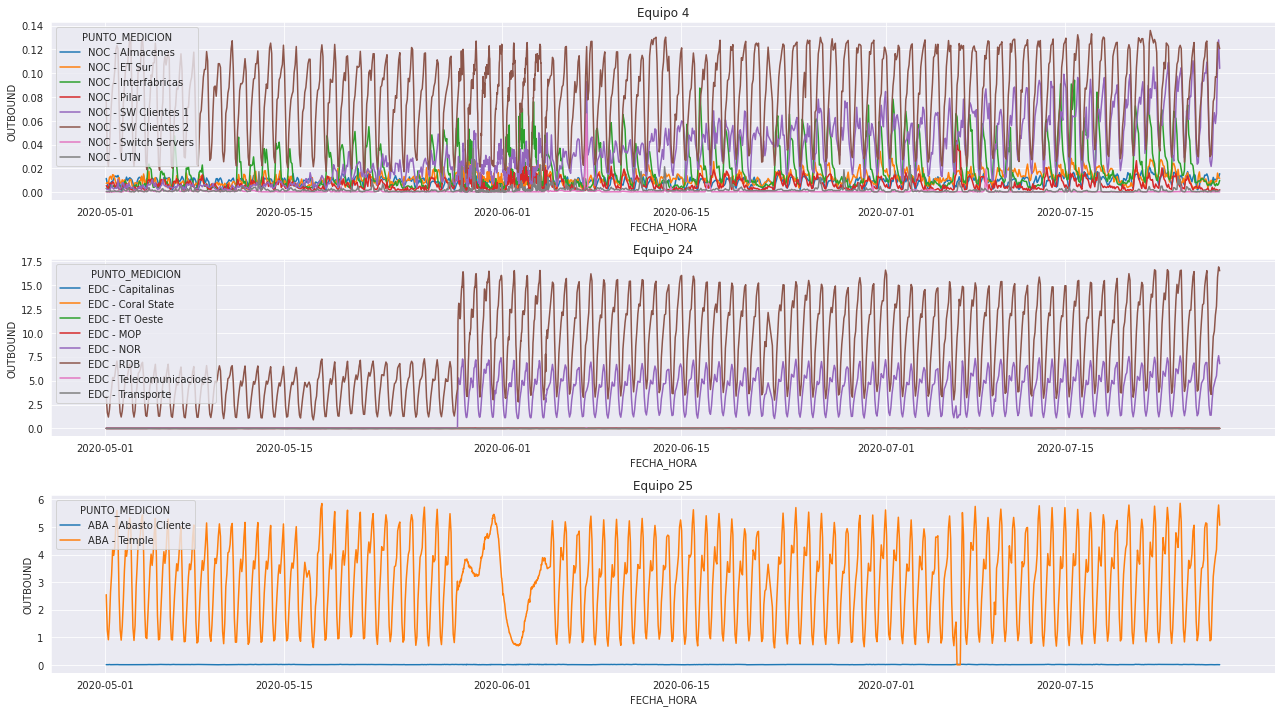

In [12]:
fig = plt.figure(figsize=(18, 10))
auxf = df

# Equipos 1, 4, 11, 23, 24, 25, 28, 30, 31, 41, 62
#ids = [1, 4, 11]
ids = [4, 24, 25]
#ids = [28, 30, 31]

idx = 0
for id in ids:
  idx += 1
  ax = plt.subplot(len(ids), 1, idx)
  sns.lineplot(x="FECHA_HORA", y="OUTBOUND", hue='PUNTO_MEDICION', 
               data=auxf[auxf.ID_EQUIPO == id], ax=ax)
  ax.set_title(f'Equipo {id}')
  # end for
plt.tight_layout()
plt.show()

Como se puede observa en la imagenes previas, las series temporales para 

* `'EDC - NOR'`
* `'EDC - RDB'`
* `'ABA - Temple'`

Tienen datos faltantes o datos que la escala de un mes no concuerda con las 
de los demas. Es decir, tienen un comportamiento anómalo, los cuales corresponden a los equipos 24 y 25. Se decide eliminar las mediciones de dichos puntos

In [13]:
meds = ['EDC - NOR','EDC - RDB', 'ABA - Temple']
df = df[~df.PUNTO_MEDICION.isin(meds)]

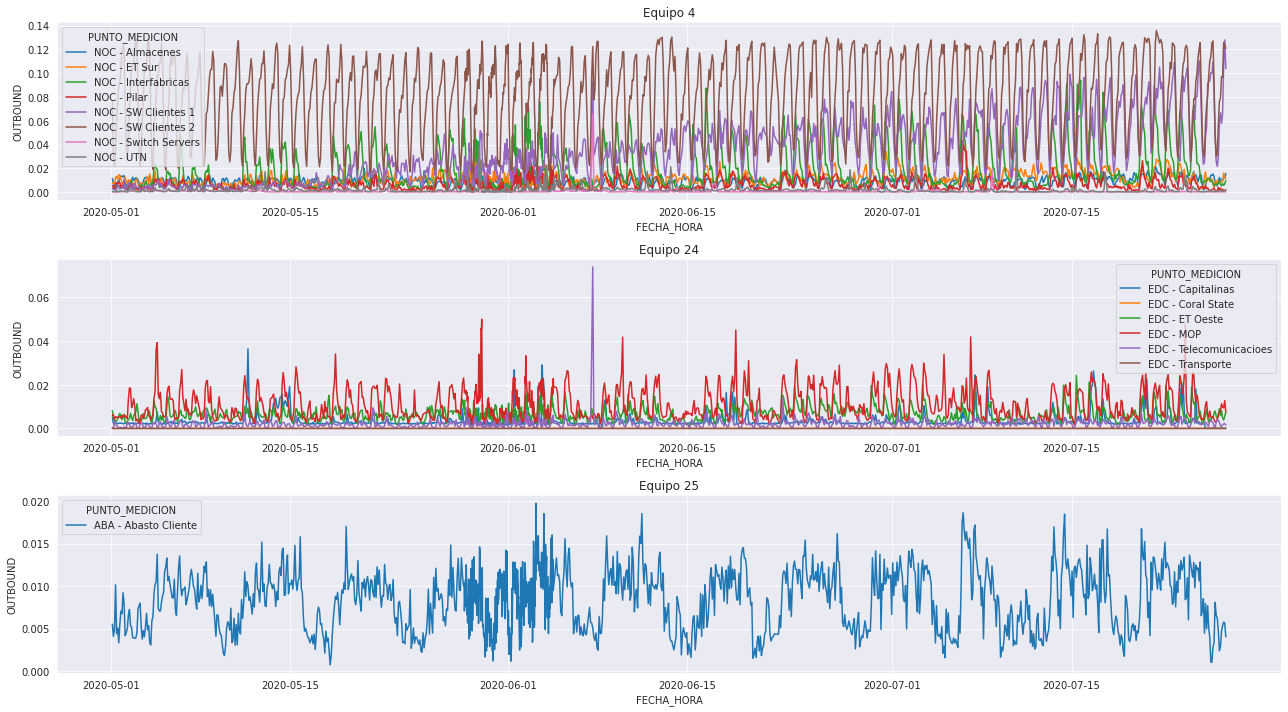

In [15]:
fig = plt.figure(figsize=(18, 10))
auxf = df
ids = [4, 24, 25]
idx = 0
for id in ids:
  idx += 1
  ax = plt.subplot(len(ids), 1, idx)
  sns.lineplot(x="FECHA_HORA", y="OUTBOUND", hue='PUNTO_MEDICION', 
               data=auxf[auxf.ID_EQUIPO == id], ax=ax)
  ax.set_title(f'Equipo {id}')
  # end for
plt.tight_layout()
plt.show()

# Parte 1
---
---

## 3 Clustering K means
---

Clustering usando `TimeSeriesKMeans`


In [16]:
df_gb = df

Se arma un tabla en donde 
 * las columnas son los puntos de medicion 
 * el indice es fecha/hora tomada la medicion
 * los valores son el trafico `OUTBOUND`

 

In [17]:
cols= ['PUNTO_MEDICION', 'OUTBOUND', 'FECHA_HORA_IDX']

df_gb = df_gb[cols].pivot(
    index='FECHA_HORA_IDX', columns='PUNTO_MEDICION', values=['OUTBOUND'])

df_gb.columns = df_gb.columns.droplevel()
df_gb = df_gb.dropna()

In [18]:
df_gb.head(5)

PUNTO_MEDICION       ABA - Abasto Cliente  ...  Yocsina - Mogote
FECHA_HORA_IDX                             ...                  
2020-05-01 03:00:00              0.005511  ...          0.313744
2020-05-01 05:00:00              0.004081  ...          0.268583
2020-05-01 07:00:00              0.004904  ...          0.257046
2020-05-01 09:00:00              0.010150  ...          0.294852
2020-05-01 11:00:00              0.004404  ...          0.346706

[5 rows x 44 columns]

Luego es necesario traponer los datos anteriores ya que este es el modo de trabajo de las librerias de `tslearn` y `sklearn` para series temporales.

In [19]:
x_gb = df_gb.values.T # Matriz Transpuesta
x_gb.shape

(44, 1287)

### 3.1 Analisis del Codo

Observar la inercia en funcion del numero de clusters

In [20]:
inertia = []
silhouet = []
for n in range(2, 11):
    km = TimeSeriesKMeans(n_clusters=n, n_jobs=4, random_state=42, 
                          max_iter=1000, metric='euclidean').fit(x_gb) 
                          #  “softdtw” , 'euclidean'
    inertia.append(km.inertia_)
    silhouet.append(silhouette_score(x_gb, km.labels_,  metric='euclidean'))

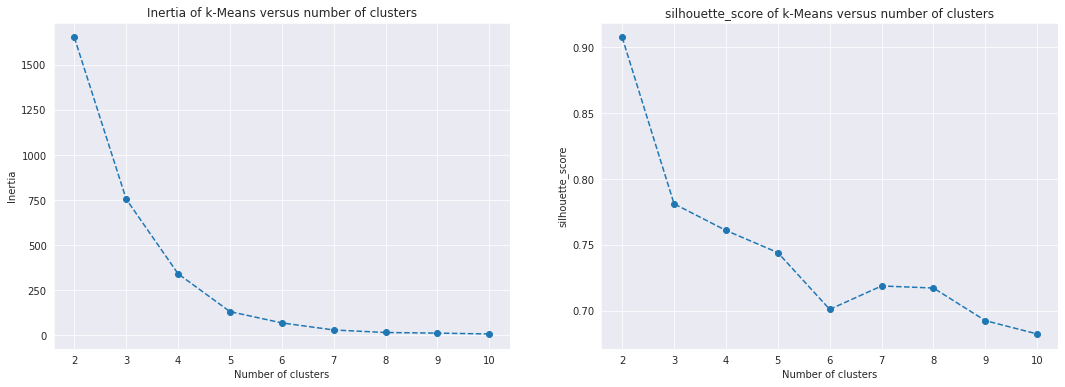

In [21]:
plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 2, 1)
ax.plot(np.arange(2, 11), inertia, marker='o', linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel("Inertia")
ax.set_title("Inertia of k-Means versus number of clusters")

ax = plt.subplot(1, 2, 2)
ax.plot(np.arange(2, 11), silhouet, marker='o', linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel("silhouette_score")
ax.set_title("silhouette_score of k-Means versus number of clusters")

plt.show()

En funcion del grafico anterior la cantidad de clusters en donde existe 
una desaceleracion de la inercia se encuentra entre 4 y 6 clusters. 

In [22]:
n_clusters = 5
km = TimeSeriesKMeans(
    n_clusters=n_clusters, verbose=True, random_state=5, max_iter=1000,
    #metric='softdtw'
    metric='euclidean'
    )
y_pred = km.fit_predict(x_gb)

170.175 --> 131.489 --> 131.489 --> 


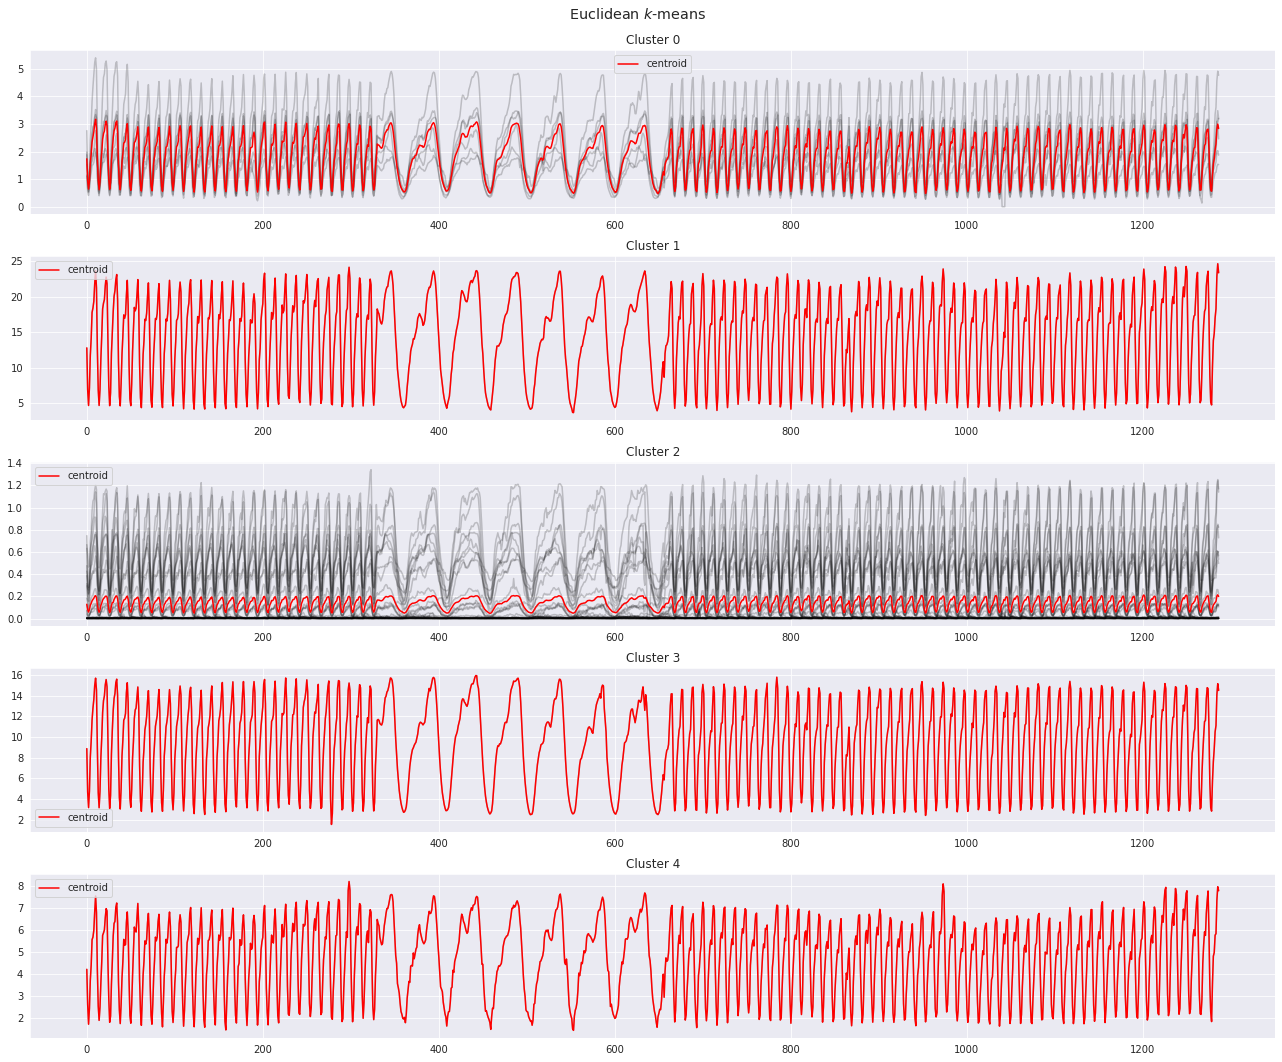

In [23]:
sz = x_gb.shape[1]

fig = plt.figure(figsize=(18, 15))
for yi in range(n_clusters):
    ax = plt.subplot(n_clusters, 1, yi + 1)
    for xx in x_gb[y_pred == yi]:
        ax.plot(xx.ravel(), "k-", alpha=.2)
    ax.plot(km.cluster_centers_[yi].ravel(), "r-", label='centroid')
    ax.set_title(f'Cluster {yi}')
    ax.legend()

plt.tight_layout()
fig.suptitle("Euclidean $k$-means", fontsize='x-large')
fig.subplots_adjust(top=0.94)
plt.show()

#### Cantidad de Casos por Cluster

Como se puede observar en la imagen siguiente imagen realiza una agrupacion desvalanceadas.

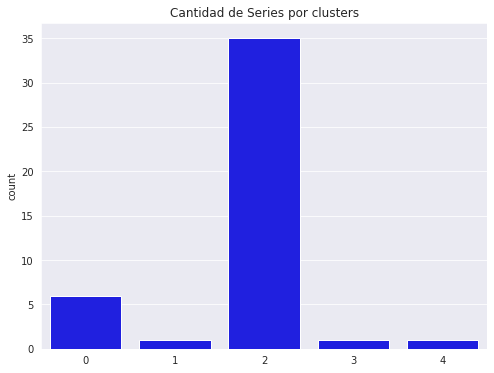

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(y_pred, color="b")
plt.title('Cantidad de Series por clusters')
plt.show()

In [25]:
grupos = {}
for col in zip(df_gb.columns, y_pred) :
  grupos[col[0]] = col[1]

for key, value in grupos.items():
  df.loc[df.PUNTO_MEDICION == key , 'kmean'] = value

### 3.2 Análisis de los clusters encontrados

In [26]:
df[['PUNTO_MEDICION','kmean']].groupby('kmean').agg(['count'])

PUNTO_MEDICION
               count
kmean               
0.0             7746
1.0             1291
2.0            45185
3.0             1291
4.0             1291

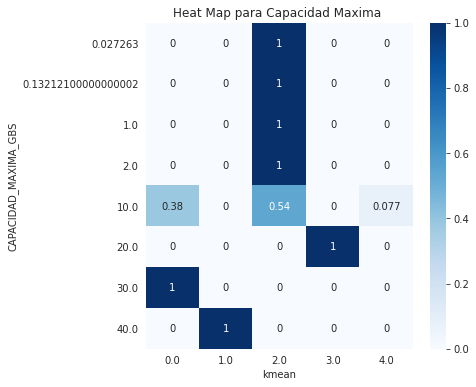

In [27]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
sns.heatmap(
    pd.crosstab(df.CAPACIDAD_MAXIMA_GBS, df['kmean'], normalize='index'), 
    cmap="Blues", annot=True, ax=ax)
ax.set_title('Heat Map para Capacidad Maxima ')
plt.show()

Como se puede observar El modelo esta agrupando de acuerdo al tráfico de salida como principal componente, aunque algunos puntos son clusterizados solos.

* cluster 0 
  * 30 Gbs
* cluster 1
  * 40 Gbs
* cluster 2
  * 2, 1, 0.13, 0.02 Gbs
* cluster 3
  * 30 Gbs

Vamos a tratar de hacer un análisis más detallado

#### Cluster 0

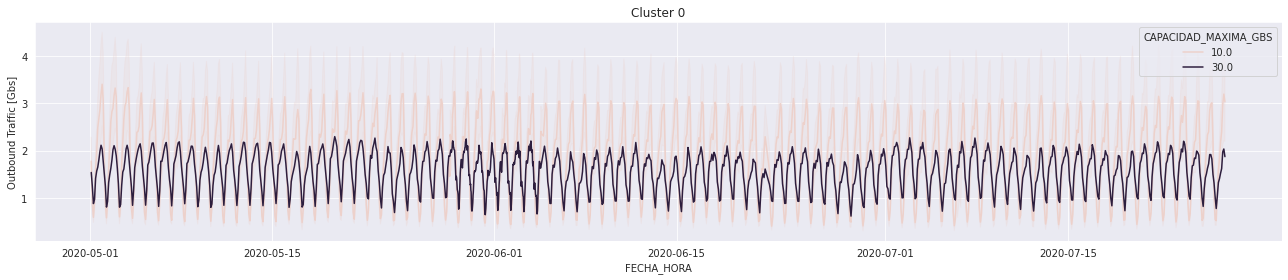

In [28]:
fig = plt.figure(figsize=(18, 4))
auxf = df[df.kmean == 0]
ax = plt.subplot(1, 1, 1)
sns.lineplot(x="FECHA_HORA", y="OUTBOUND", hue='CAPACIDAD_MAXIMA_GBS', 
             data=auxf, ax=ax)
ax.set_title('Cluster 0')
ax.set_ylabel('Outbound Traffic [Gbs]')
plt.tight_layout()
plt.show()

In [29]:
df.loc[(df.kmean==0)][['PUNTO_MEDICION','ID_EQUIPO']].groupby('PUNTO_MEDICION').agg(['count'])

ID_EQUIPO
                          count
PUNTO_MEDICION                 
JM - Totoral Vieja         1291
NOC - 6720HI to N20-1      1291
RDB - GZU                  1291
RDB - RIO                  1291
SF - Freyre                1291
Yocsina - Carlos Paz       1291

In [30]:
df.loc[(df.kmean==0)][['CAPACIDAD_MAXIMA_GBS','ID_EQUIPO']].groupby('CAPACIDAD_MAXIMA_GBS').agg(['count'])

ID_EQUIPO
                         count
CAPACIDAD_MAXIMA_GBS          
10.0                      6455
30.0                      1291

Agrupa los puntos de medición cuyo tráfico de salida tienen un rango de 1 a 4 Gb aproximadamente, por más que el punto de medicion `'NOC - 6720HI to N20-1'` tiene una capacidad maxima de `30 Gbs`, su tráfico es bajo.

#### Cluster 1

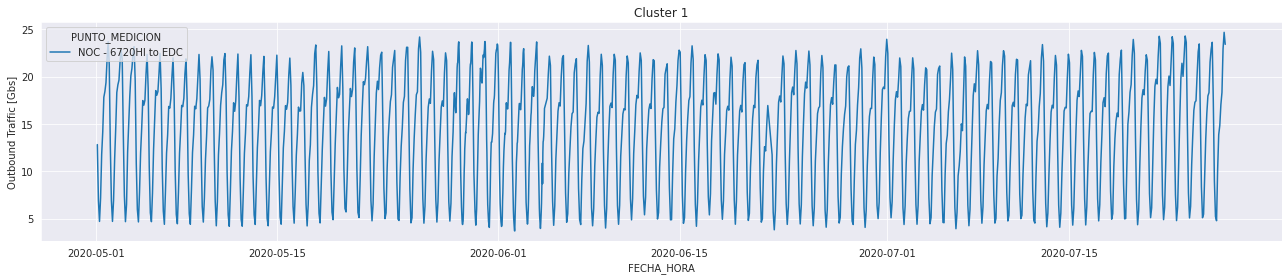

In [31]:
fig = plt.figure(figsize=(18, 4))
auxf = df[df.kmean == 1]
ax = plt.subplot(1, 1, 1)
sns.lineplot(x="FECHA_HORA", y="OUTBOUND", hue='PUNTO_MEDICION', 
             data=auxf, ax=ax)
ax.set_title('Cluster 1')
ax.set_ylabel('Outbound Traffic [Gbs]')
plt.tight_layout()
plt.show()

In [32]:
df.loc[(df.kmean==1)][['PUNTO_MEDICION','ID_EQUIPO']].groupby('PUNTO_MEDICION').agg(['count'])

ID_EQUIPO
                        count
PUNTO_MEDICION               
NOC - 6720HI to EDC      1291

In [33]:
df.loc[(df.kmean==1)][['CAPACIDAD_MAXIMA_GBS','ID_EQUIPO']].groupby('CAPACIDAD_MAXIMA_GBS').agg(['count'])

ID_EQUIPO
                         count
CAPACIDAD_MAXIMA_GBS          
40.0                      1291

Clusteriza el único equipo que hay con una capacidad de 40 GB, cuyo trafico oscila entre los 5 y los 24 GB

#### Cluster 2

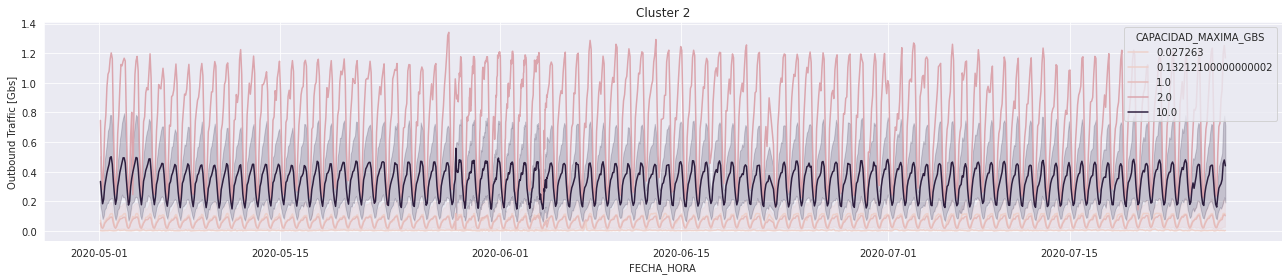

In [34]:
fig = plt.figure(figsize=(18, 4))
auxf = df[df.kmean == 2]
ax = plt.subplot(1, 1, 1)
sns.lineplot(x="FECHA_HORA", y="OUTBOUND", hue='CAPACIDAD_MAXIMA_GBS', 
             data=auxf, ax=ax)
ax.set_title('Cluster 2')
ax.set_ylabel('Outbound Traffic [Gbs]')
plt.tight_layout()
plt.show()

In [ ]:
df.loc[(df.kmean==2)][['PUNTO_MEDICION','ID_EQUIPO']].groupby('PUNTO_MEDICION').agg(['count'])

ID_EQUIPO
                                   count
PUNTO_MEDICION                          
ABA - Abasto Cliente                1291
BAZ - Carlos Paz                    1291
BAZ - Yocsina                       1291
Carlos Paz - Cosquin                1291
Carlos Paz - La Falda               1291
EDC - Capitalinas                   1291
EDC - Coral State                   1291
EDC - ET Oeste                      1291
EDC - MOP                           1291
EDC - Telecomunicacioes             1291
EDC - Transporte                    1291
JM - Totoral Nueva                  1291
NOC - 6720HI to ETC                 1291
NOC - 6720HI to R4 Silica           1291
NOC - 6720HI to RPrivado            1291
NOC - ACHALA - Servicios            1291
NOC - ACHALA - Solo Dolores         1291
NOC - Almacenes                     1291
NOC - ET Sur                        1291
NOC - Interfabricas                 1291
NOC - Pilar                         1291
NOC - SW Clientes 1                 1291
NOC - SW Clientes 2                 1291
NOC - Switch Servers                1291
NOC - UTN                           1291
RDB - ET Don Bosco - San Roque      1291
RDB - ET La Calera                  1291
RDB - Escuela de Capacitacion       1291
RDB - PEA                           1291
SF - La Francia                     1291
SF - Las Varillas                   1291
SF - SF Adm                         1291
SF - SF Cliente                     1291
Yocsina - Alta Gracia               1291
Yocsina - Mogote                    1291

In [ ]:
df.loc[(df.kmean==2)][['CAPACIDAD_MAXIMA_GBS','ID_EQUIPO']].groupby('CAPACIDAD_MAXIMA_GBS').agg(['count'])

ID_EQUIPO
                         count
CAPACIDAD_MAXIMA_GBS          
0.027263                  1291
0.132121                  1291
1.000000                 32275
2.000000                  1291
10.000000                 9037

En esta agrupación quedaron todos los equipos con menor ancho de banda, es decir que tienen un tráfico entre 0,02 y 1.2 Gb aproximadamente.

Que a pesar que los puertos tienen 10 Gbs de capacidad maxima 
los picos de traficos son bajos  

#### Cluster 3

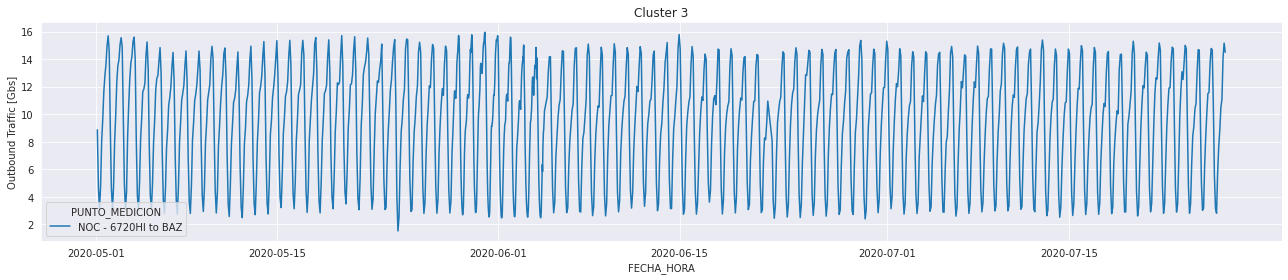

In [35]:
fig = plt.figure(figsize=(18, 4))
auxf = df[df.kmean == 3]
ax = plt.subplot(1, 1, 1)
sns.lineplot(x="FECHA_HORA", y="OUTBOUND", hue='PUNTO_MEDICION', 
             data=auxf, ax=ax)
ax.set_title('Cluster 3')
ax.set_ylabel('Outbound Traffic [Gbs]')
plt.tight_layout()
plt.show()

In [36]:
df.loc[(df.kmean==3)][['PUNTO_MEDICION','ID_EQUIPO']].groupby('PUNTO_MEDICION').agg(['count'])

ID_EQUIPO
                        count
PUNTO_MEDICION               
NOC - 6720HI to BAZ      1291

In [37]:
df.loc[(df.kmean==3)][['CAPACIDAD_MAXIMA_GBS','ID_EQUIPO']].groupby('CAPACIDAD_MAXIMA_GBS').agg(['count'])

ID_EQUIPO
                         count
CAPACIDAD_MAXIMA_GBS          
20.0                      1291

Puede ser porque hubo un corte grande de ancho de banda alrededor del 20/06, es uno de los enlaces escenciales de la Empresa, por lo cual esta monitoreado constantemente

#### Cluster 4

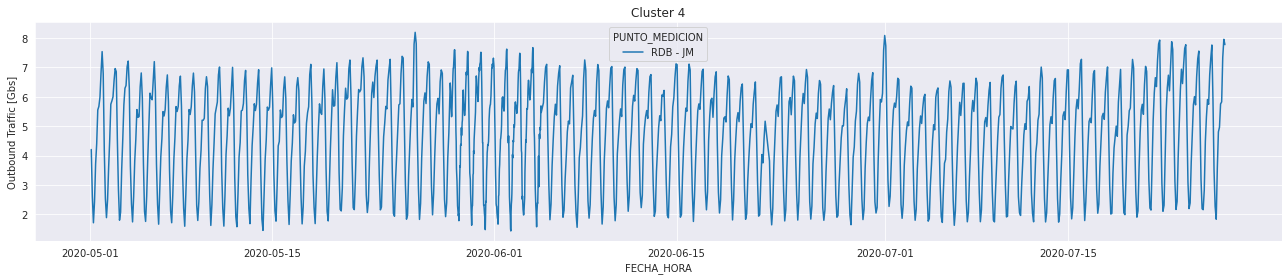

In [38]:
fig = plt.figure(figsize=(18, 4))
auxf = df[df.kmean == 4]
ax = plt.subplot(1, 1, 1)
sns.lineplot(x="FECHA_HORA", y="OUTBOUND", hue='PUNTO_MEDICION', 
             data=auxf, ax=ax)
ax.set_title('Cluster 4')
ax.set_ylabel('Outbound Traffic [Gbs]')
plt.tight_layout()
plt.show()

In [39]:
df.loc[(df.kmean==4)][['PUNTO_MEDICION','ID_EQUIPO']].groupby('PUNTO_MEDICION').agg(['count'])

ID_EQUIPO
                   count
PUNTO_MEDICION          
RDB - JM            1291

In [ ]:
df.loc[(df.kmean==4)][['CAPACIDAD_MAXIMA_GBS','ID_EQUIPO']].groupby('CAPACIDAD_MAXIMA_GBS').agg(['count'])

ID_EQUIPO
                         count
CAPACIDAD_MAXIMA_GBS          
10.0                      1291

Este punto de medición se maneja con un único puerto a diferencia de los otros casos, que se manejan con más de un puerto. Puede radicarse en este motivo el porque lo clusterizo solo, ademas de que este el unico puerto cuyo trafico maximo esta cerca de su capacidad maxima.

## 4 Clustering Agglomerativos
---


#### Grafico de Jerarquía de cada Cluster

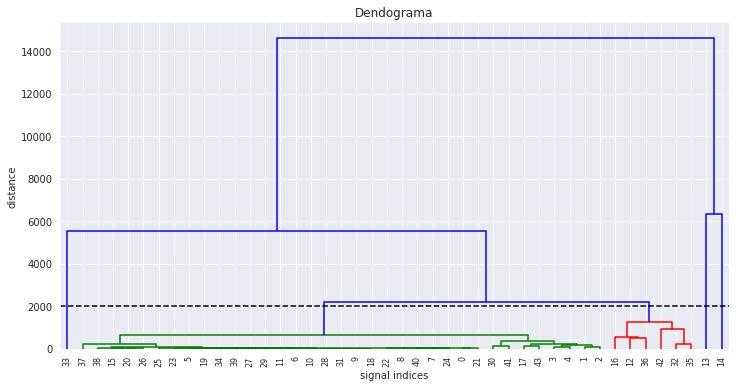

In [ ]:
H = hierarchy.linkage(x_gb, method='average', metric='cityblock') # = hierarchy.ward
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 1, 1)
hierarchy.dendrogram(
    H, ax=ax, p=5, show_leaf_counts=True, show_contracted=True, 
    get_leaves=True, color_threshold=2000)

plt.axhline(y=2000, c='black', linestyle='--');
plt.xlabel('signal indices')
plt.ylabel('distance')
plt.title('Dendograma')
plt.show()

De acuerdo dendograma vemos que la mejor agrupacion es usando un limite de 2000
para la distancia ya que nos genera 5 grupos 2 grandes y 3 de puntos aislados.

In [40]:
# clustering
n_clusters = 5
model = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="average", affinity="cityblock")
model.fit(x_gb)
y_pred = model.labels_
children = model.children_

#### Grafico Aglomerativo de las series de tiempo de cada cluster 

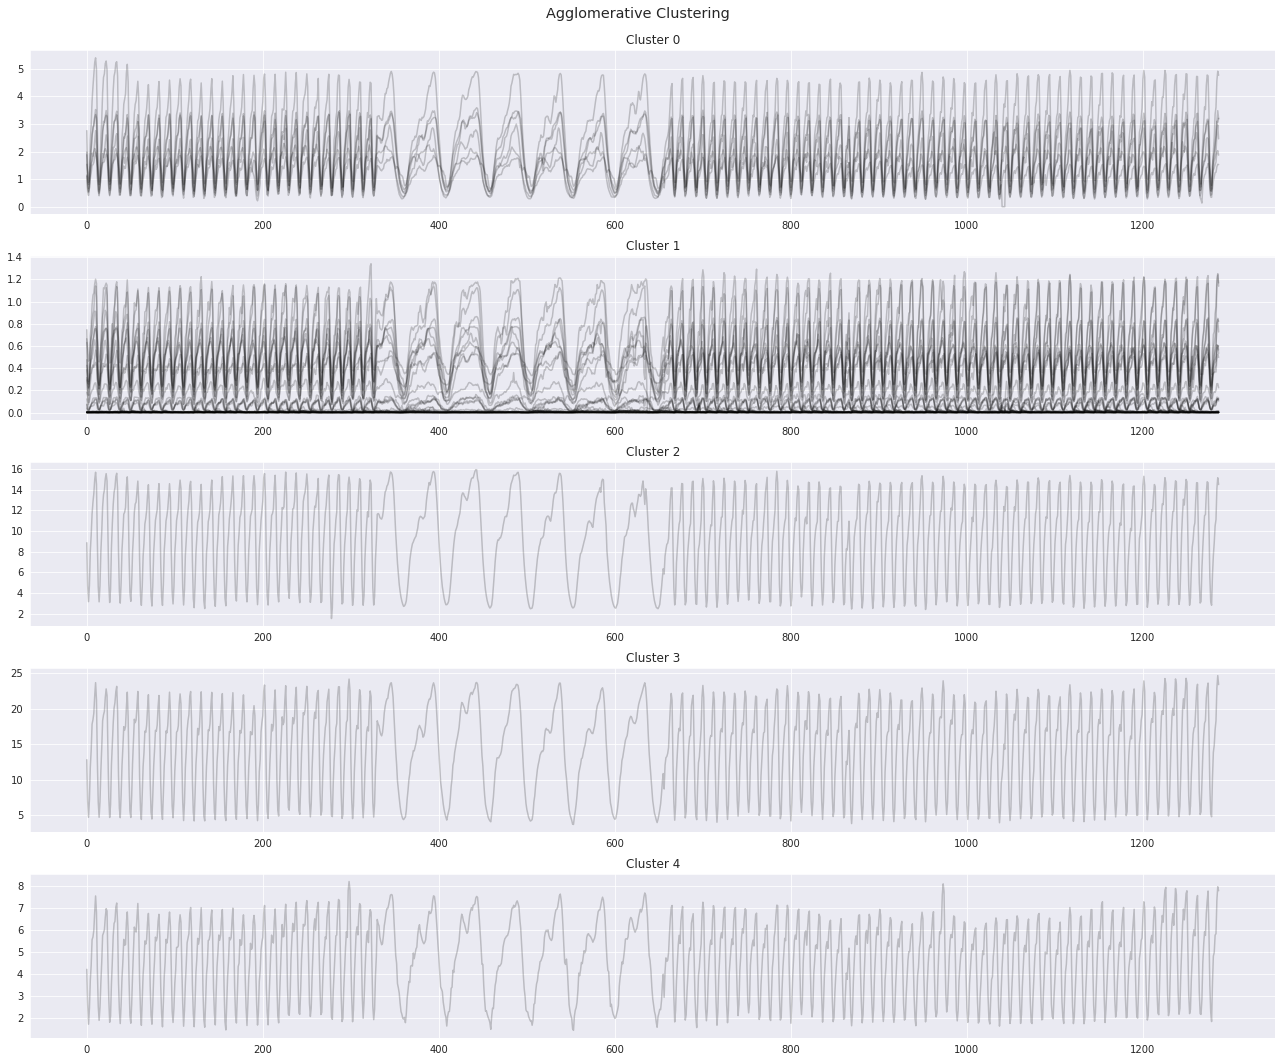

In [41]:
sz = x_gb.shape[1]

fig = plt.figure(figsize=(18, 15))
for yi in range(n_clusters):
    ax = plt.subplot(n_clusters, 1, yi + 1)
    for xx in x_gb[y_pred == yi]:
        ax.plot(xx.ravel(), "k-", alpha=.2)
    #ax.plot(model.cluster_centers_[yi].ravel(), "r-")
    ax.set_title(f'Cluster {yi}')

plt.tight_layout()
fig.suptitle("Agglomerative Clustering", fontsize='x-large')
fig.subplots_adjust(top=0.94)
plt.show()

In [42]:
grupos = {}
for col in zip(df_gb.columns, y_pred) :
  grupos[col[0]] = col[1]

for key, value in grupos.items():
  df.loc[df.PUNTO_MEDICION == key , 'agg'] = value

### 4.2 Análisis de los clusters encontrados

In [43]:
df[['PUNTO_MEDICION','agg']].groupby('agg').agg(['count'])

PUNTO_MEDICION
             count
agg               
0.0           7746
1.0          45185
2.0           1291
3.0           1291
4.0           1291

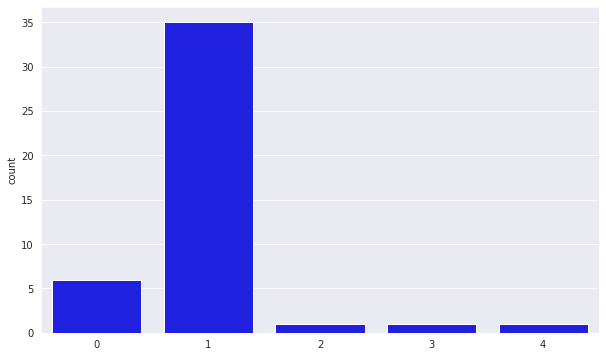

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(y_pred, color="b")
plt.show()

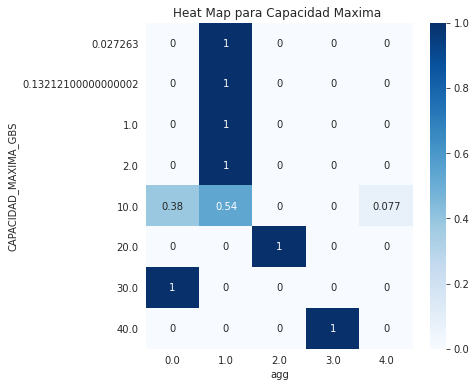

In [45]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
sns.heatmap(
    pd.crosstab(df.CAPACIDAD_MAXIMA_GBS, df['agg'], normalize='index'), 
    cmap="Blues", annot=True, ax=ax)
ax.set_title('Heat Map para Capacidad Maxima ')
plt.show()

Los clusters encontrados usando el modelo aglomerativo encuentra los mismos
clusters que K means

# Parte 2
---
---

## 5 Segundo Analisis
---
Como los patrones de trafico para los punto de medicion cuyas capacidades maximas son superiores a 10 GB tienen comportamientos similares en cuanto a picos y valles. 
Entonces el cluster que tiene un mayor numero puntos de medicion amerita un segundo analisis.

In [46]:
df_low = df[df.kmean == 2]

In [47]:
cols= ['PUNTO_MEDICION', 'OUTBOUND', 'FECHA_HORA_IDX']

gb_low = df_low[cols].pivot(
    index='FECHA_HORA_IDX', columns='PUNTO_MEDICION', values=['OUTBOUND'])

gb_low.columns = gb_low.columns.droplevel()
gb_low = gb_low.dropna()
gb_low.head(5)

PUNTO_MEDICION       ABA - Abasto Cliente  ...  Yocsina - Mogote
FECHA_HORA_IDX                             ...                  
2020-05-01 03:00:00              0.005511  ...          0.313744
2020-05-01 05:00:00              0.004081  ...          0.268583
2020-05-01 07:00:00              0.004904  ...          0.257046
2020-05-01 09:00:00              0.010150  ...          0.294852
2020-05-01 11:00:00              0.004404  ...          0.346706

[5 rows x 35 columns]

In [48]:
x_low = gb_low.values.T 
x_low.shape

(35, 1287)

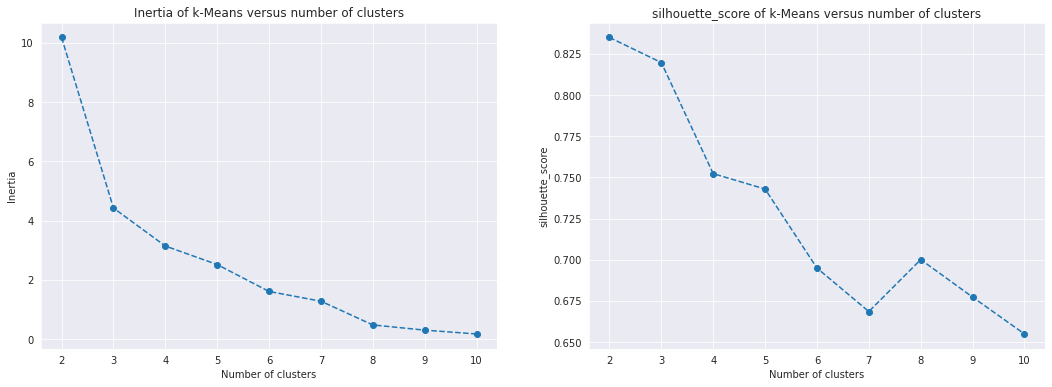

In [49]:
inertia = []
silhouet = []
for n in range(2, 11):
    km = TimeSeriesKMeans(n_clusters=n, n_jobs=4, random_state=42, 
                          max_iter=1000, metric='euclidean').fit(x_low) 
                          #  “softdtw” , 'euclidean'
    inertia.append(km.inertia_)
    silhouet.append(silhouette_score(x_low, km.labels_,  metric='euclidean'))

plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 2, 1)
ax.plot(np.arange(2, 11), inertia, marker='o', linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel("Inertia")
ax.set_title("Inertia of k-Means versus number of clusters")

ax = plt.subplot(1, 2, 2)
ax.plot(np.arange(2, 11), silhouet, marker='o', linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel("silhouette_score")
ax.set_title("silhouette_score of k-Means versus number of clusters")

plt.show()

De acuerdo al analisis del codo la cantidad de clusters adecuada es entre 3 y 8
Nosotros elejimos 5.

In [50]:
n_clusters = 5
km = TimeSeriesKMeans(
    n_clusters=n_clusters, verbose=True, random_state=5, max_iter=1000,
    #metric='softdtw'
    metric='euclidean'
    )
y_pred = km.fit_predict(x_low)

3.216 --> 1.801 --> 1.801 --> 


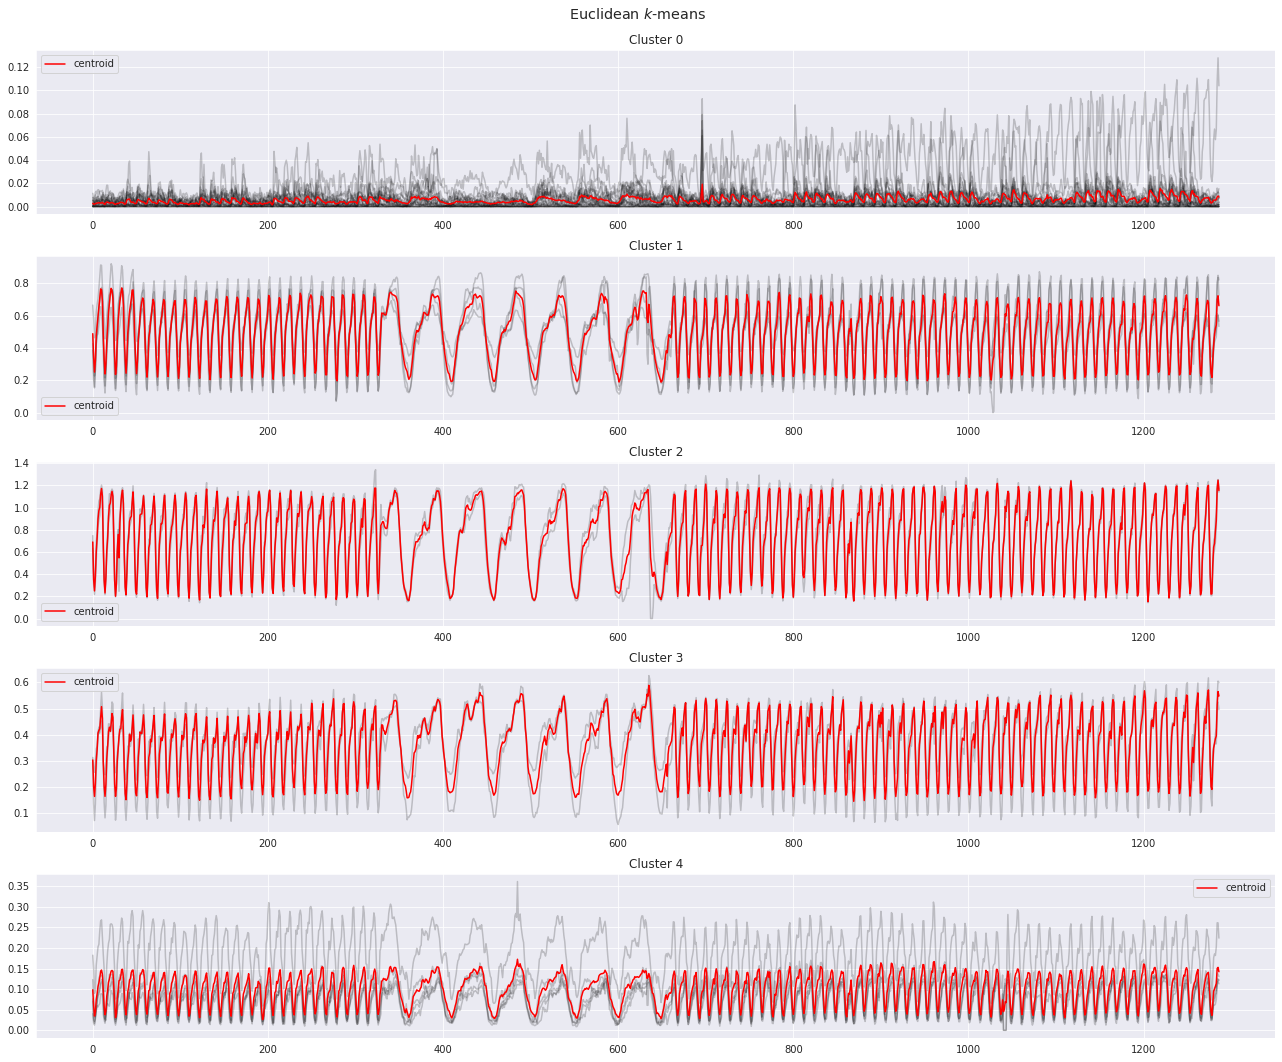

In [52]:
sz = x_low.shape[1]

fig = plt.figure(figsize=(18, 15))
for yi in range(n_clusters):
    ax = plt.subplot(n_clusters, 1, yi + 1)
    for xx in x_low[y_pred == yi]:
        ax.plot(xx.ravel(), "k-", alpha=.2)
    ax.plot(km.cluster_centers_[yi].ravel(), "r-", label='centroid')
    ax.set_title(f'Cluster {yi}')
    ax.legend()

plt.tight_layout()
fig.suptitle("Euclidean $k$-means", fontsize='x-large')
fig.subplots_adjust(top=0.94)
plt.show()

In [53]:
grupos = {}
for col in zip(gb_low.columns, y_pred) :
  grupos[col[0]] = col[1]

for key, value in grupos.items():
  df_low.loc[df_low.PUNTO_MEDICION == key , 'kmean'] = value

In [54]:
df_low[['PUNTO_MEDICION','kmean']].groupby('kmean').agg(['count'])

PUNTO_MEDICION
               count
kmean               
0.0            28402
1.0             5164
2.0             2582
3.0             2582
4.0             6455

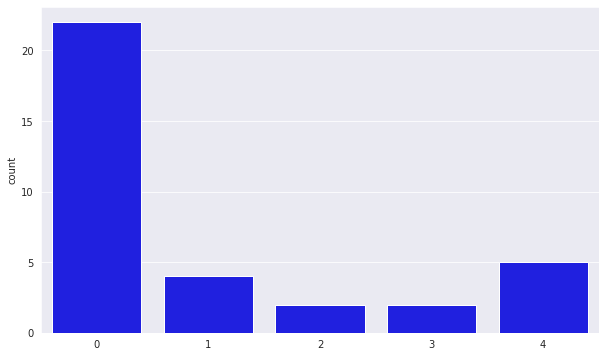

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(y_pred, color="b")
plt.show()

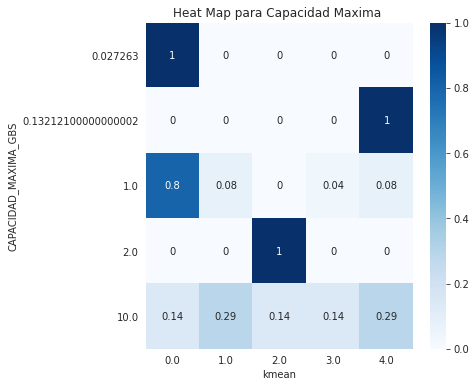

In [56]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
sns.heatmap(
    pd.crosstab(df_low.CAPACIDAD_MAXIMA_GBS, df_low['kmean'], normalize='index'), 
    cmap="Blues", annot=True, ax=ax)
ax.set_title('Heat Map para Capacidad Maxima ')
plt.show()

De acuerdo al grafico no hace una separacion en base a la capacidad de cada puerto. La separacion esta dada en funcion de los picos maximos alcanzado y del patro de trafico.

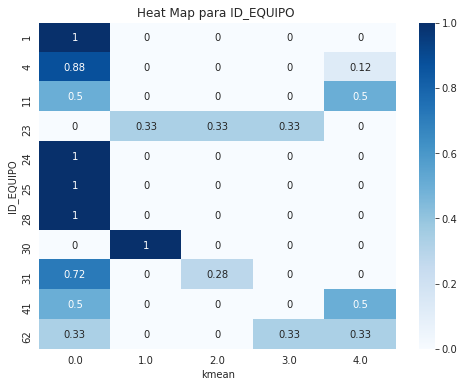

In [57]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)
sns.heatmap(
    pd.crosstab(df_low.ID_EQUIPO, df_low['kmean'], normalize='index'), 
    cmap="Blues", annot=True, ax=ax)
ax.set_title('Heat Map para ID_EQUIPO ')
plt.show()

Tampoco hace una separacion en base al patron de trafico por equipo

## Conclusion

Evidentemente realiza la clusterizacion de las Series de Tiempo principalmente por la capacidad de la red, aunque podemos verificar que dos de los cluster detectados poseen las misma capacidad y sin embargo los separa del resto.

En este caso que se calculo la feature outbound de acuerdo al tipo de medida que maneja el Punto de Medición los Cluster resultantes siguieron la misma lógica que cuando estandarizamos las medidas en Gb

# Parte 3
---
---

## 6 Analisis por equipo
---

Para el primer caso se elimina el punto `'NOC - SW Clientes 2'` ya que este tiene un patro de trafico similar a la mayoria de los puntos de medicion. 

El proposito de este analisis es clasificar a los punto de medicion que tienen patrones de traficos irregulares.

In [58]:
df_irr = df[df.PUNTO_MEDICION != 'NOC - SW Clientes 2']

4


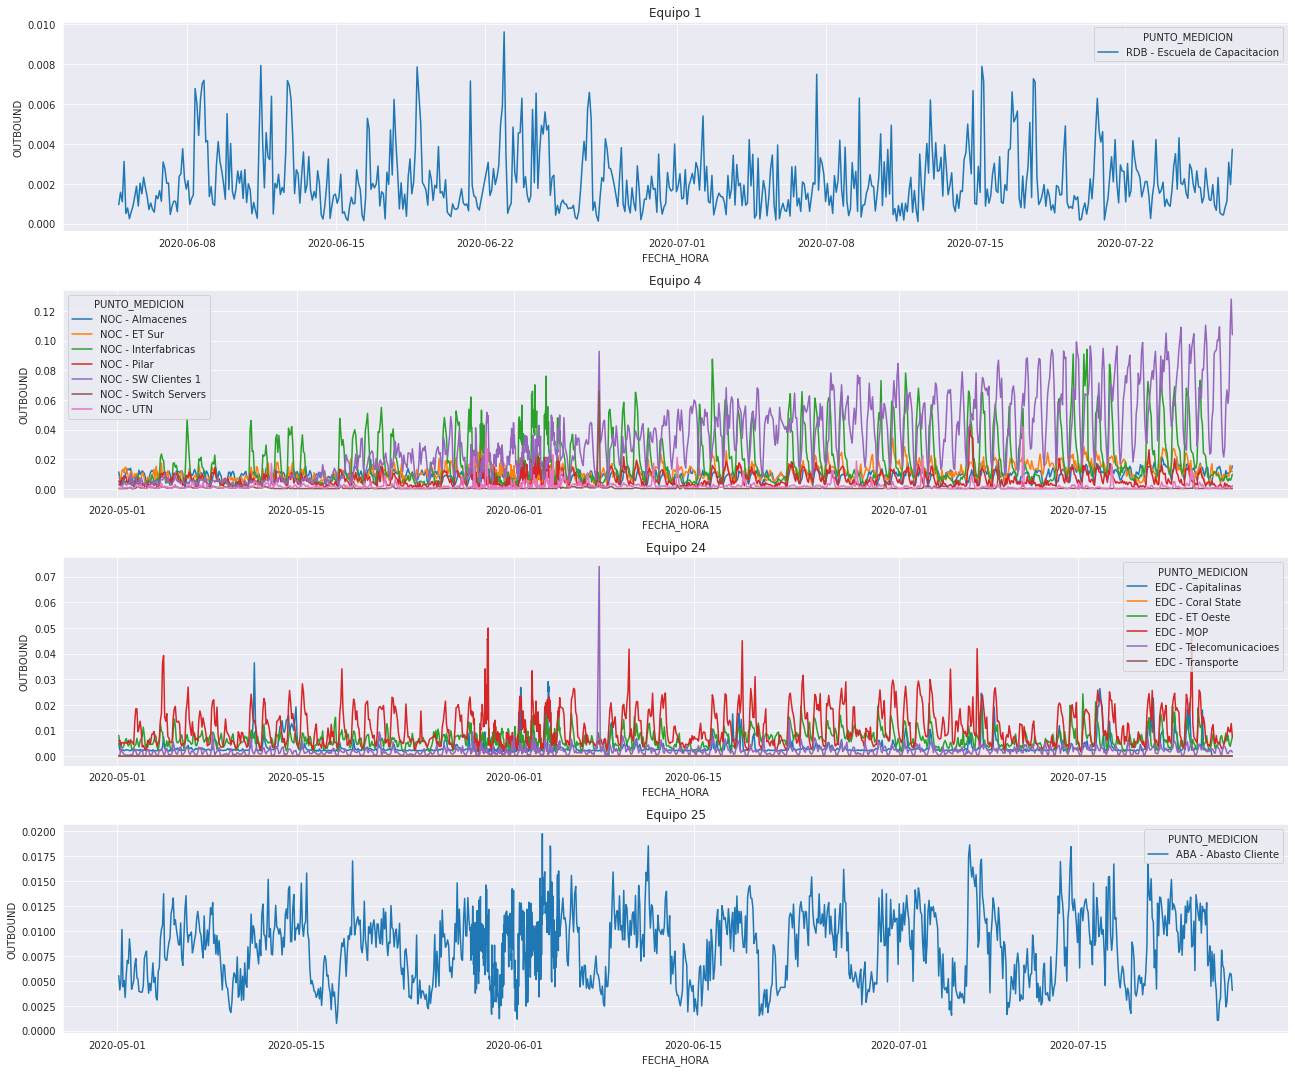

In [59]:
fig = plt.figure(figsize=(18, 15))
auxf = df_irr
ids = [1, 4, 24, 25]
print(len(ids))

idx = 0
for id in ids:
  idx += 1
  ax = plt.subplot(len(ids), 1, idx)
  sns.lineplot(x="FECHA_HORA", y="OUTBOUND", hue='PUNTO_MEDICION', 
               data=auxf[auxf.ID_EQUIPO == id], ax=ax)
  ax.set_title(f'Equipo {id}')
  # end for
plt.tight_layout()
plt.show()

In [60]:
df_irr = df_irr[df_irr.ID_EQUIPO.isin(ids)]

In [61]:
cols= ['PUNTO_MEDICION', 'OUTBOUND', 'FECHA_HORA_IDX']

gb_irr = df_irr[cols].pivot(
    index='FECHA_HORA_IDX', columns='PUNTO_MEDICION', values=['OUTBOUND'])

gb_irr.columns = gb_irr.columns.droplevel()
gb_irr = gb_irr.dropna()
x_irr = gb_irr.values.T # distribucion t-student??
x_irr.shape

(15, 625)

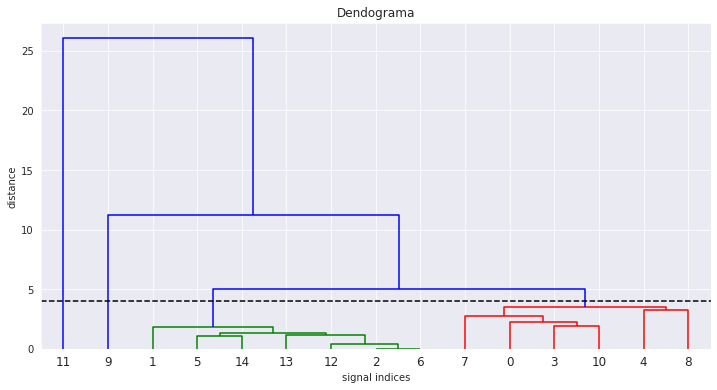

In [62]:
H = hierarchy.linkage(x_irr, method='average', metric='cityblock') # = hierarchy.ward
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 1, 1)
hierarchy.dendrogram(
    H, ax=ax, p=5, show_leaf_counts=True, show_contracted=True, 
    get_leaves=True, color_threshold=4)

plt.axhline(y=4, c='black', linestyle='--');
plt.xlabel('signal indices')
plt.ylabel('distance')
plt.title('Dendograma')
plt.show()

De acuerdo al dendograma es posible tener hasta 5 grupos dependiendo del umbral utilizado.

In [63]:
# clustering
n_clusters = 5
model = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="average", affinity="cityblock")
model.fit(x_irr)
y_pred = model.labels_

In [64]:
grupos = {}
for col in zip(gb_irr.columns, y_pred) :
  grupos[col[0]] = col[1]

for key, value in grupos.items():
  df_irr.loc[df_irr.PUNTO_MEDICION == key , 'agg'] = value

In [65]:
df_irr[['PUNTO_MEDICION','agg']].groupby('agg').agg(['count'])

PUNTO_MEDICION
             count
agg               
0.0           2582
1.0           5164
2.0           1291
3.0           1291
4.0           8371

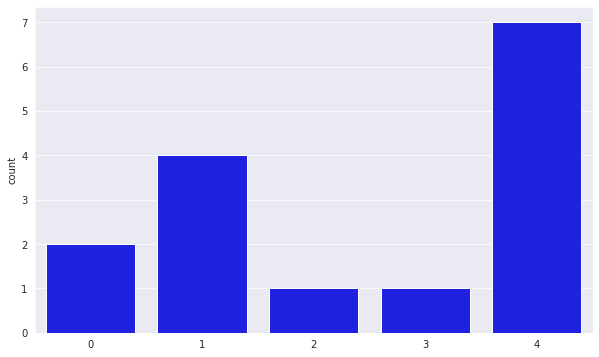

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(y_pred, color="b")
plt.show()

5


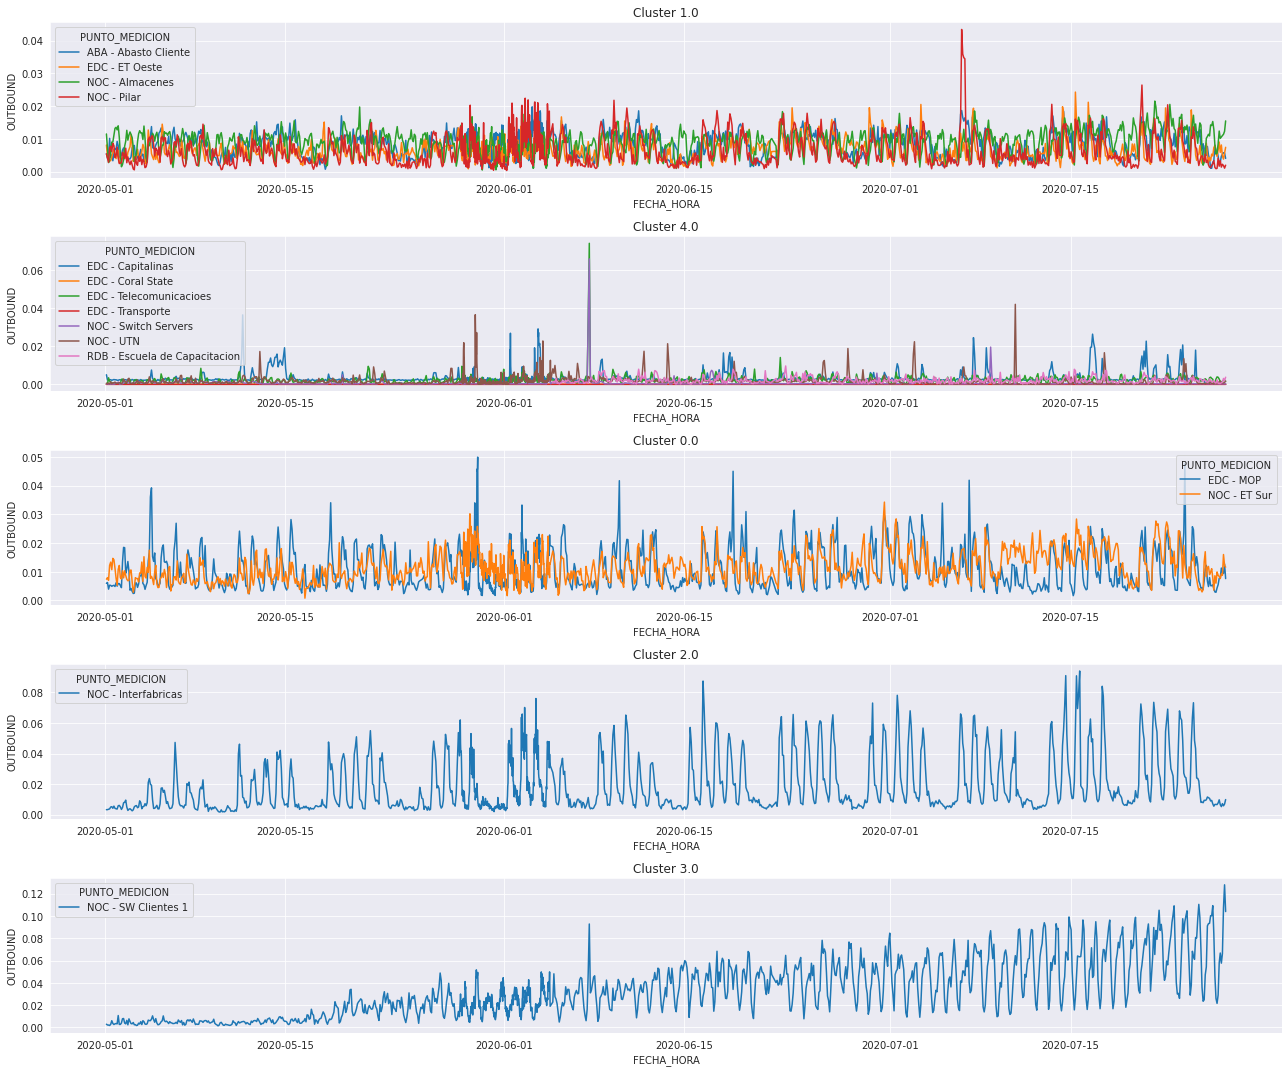

In [67]:
fig = plt.figure(figsize=(18, 15))
auxf = df_irr
ids = df_irr['agg'].unique()
print(len(ids))

idx = 0
for id in ids:
  idx += 1
  ax = plt.subplot(len(ids), 1, idx)
  sns.lineplot(x="FECHA_HORA", y="OUTBOUND", hue='PUNTO_MEDICION', 
               data=auxf[auxf['agg'] == id], ax=ax)
  ax.set_title(f'Cluster {id}')
  # end for
plt.tight_layout()
plt.show()

la mayaria del trafico de los equipos `[1, 4, 24, 25]` responde al patron de trafico similar a una oficina, es decir a que los dias de semana hay mucha actividad y los fines de semana el consumo cae,  eso se ve claramente en el `cluster 2`

Por otro lado aisla al punto de medicion `NOC SW clientes 1` que es creciente en cuanto a la demanda de trafico a lo largo del tiempo y es el unico que tiene no posee un patron similar a una oficina.

Por ultimo el `cluster 4`, son todos puntos de medición con demanda de trafico baja y que tienen eventuales picos.

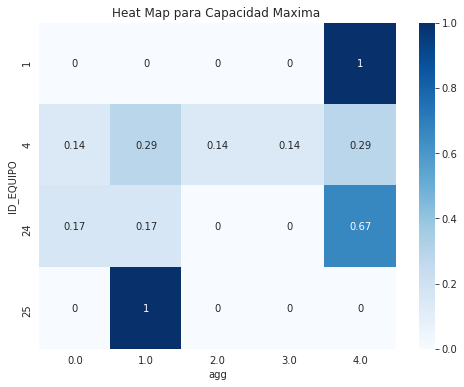

In [68]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)
sns.heatmap(
    pd.crosstab(df_irr.ID_EQUIPO, df_irr['agg'], normalize='index'), 
    cmap="Blues", annot=True, ax=ax)
ax.set_title('Heat Map para Capacidad Maxima ')
plt.show()

Evidentemente este analsis separa en base a los picos alcanzados com asi tambien al patron de trafico, ya que aisla 2 puntos de medición en cluster 3 y en cluster 4.